# Preliminary Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/60/3pf288sj26b9wkdplghc5rs80000gn/T/ipykernel_15482/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("data/heart.csv")

### Columns:
Age: Numeric (e.g., 52) \
Sex: Categorical (0: Female, 1: Male) \
Chest Pain Type: Categorical (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic) \
Resting Blood Pressure: Numeric (e.g., 125) \
Serum Cholesterol: Numeric in mg/dL (e.g., 212) \
Fasting Blood Sugar: Categorical (0: <= 120 mg/dL, 1: > 120 mg/dL) \
Resting Electrocardiographic Results: Categorical (0: Normal, 1: Abnormality, 2: Hypertrophy) \
Maximum Heart Rate Achieved: Numeric (e.g., 168) \
Exercise-Induced Angina: Categorical (0: No, 1: Yes) \
Oldpeak (ST Depression): Numeric (e.g., 1.0) \
Slope of Peak Exercise ST Segment: Categorical (0: Upsloping, 1: Flat, 2: Downsloping) \
Number of Major Vessels Colored by Fluoroscopy: Numeric (0 to 3) \
Thalassemia: Categorical (0: Normal, 1: Fixed Defect, 2: Reversible Defect)

## Checking for NAS

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Preliminary Overviews

In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
numeric =df.select_dtypes("number")
numeric.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.536390
dtype: float64

In [7]:
numeric.median()

age          56.00
sex           1.00
cp            1.00
trestbps    130.00
chol        240.00
fbs           0.00
restecg       1.00
thalach     152.00
exang         0.00
oldpeak       0.80
slope         1.00
ca            0.00
thal          2.00
target        0.71
dtype: float64

In [8]:
df["sex"].mean()
# ~70% male dataset

0.6956097560975609

In [9]:
df["trestbps"].mean()

131.61170731707318

In [10]:
df["trestbps"].max()

200

In [11]:
df["trestbps"].min()

94

In [12]:
#Range
numeric.max() - numeric.min()
#Only makes sense for a few columns

age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        0.8
dtype: float64

In [13]:
df.describe()

summary_stats = df.describe()
summary_stats.loc[["min","max"], "trestbps"]

min     94.0
max    200.0
Name: trestbps, dtype: float64

## Graphical Analyses

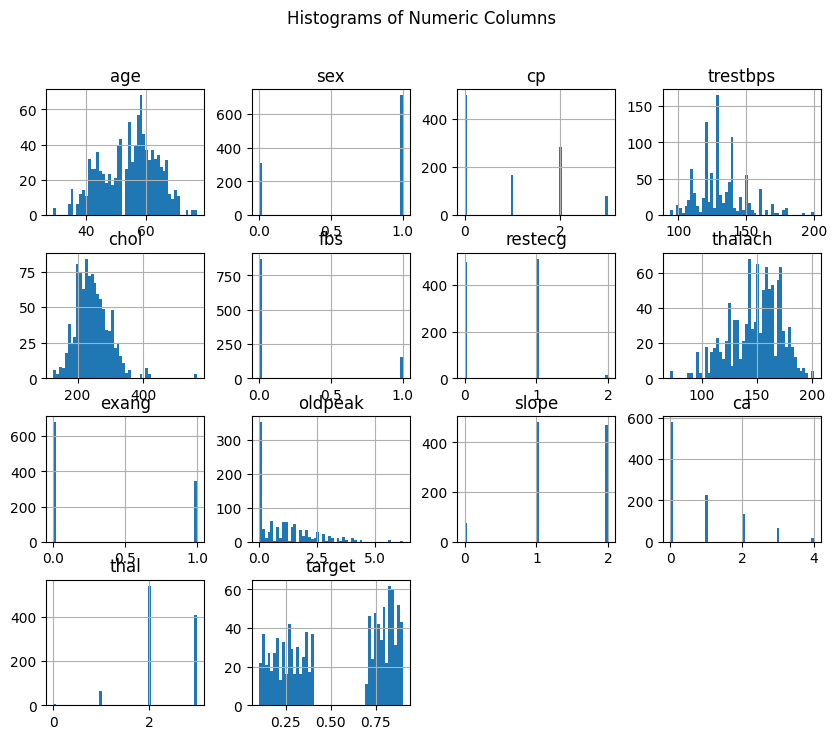

In [14]:
df.hist(figsize=(10,8),bins=50)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

array([[<Axes: title={'center': 'target'}>]], dtype=object)

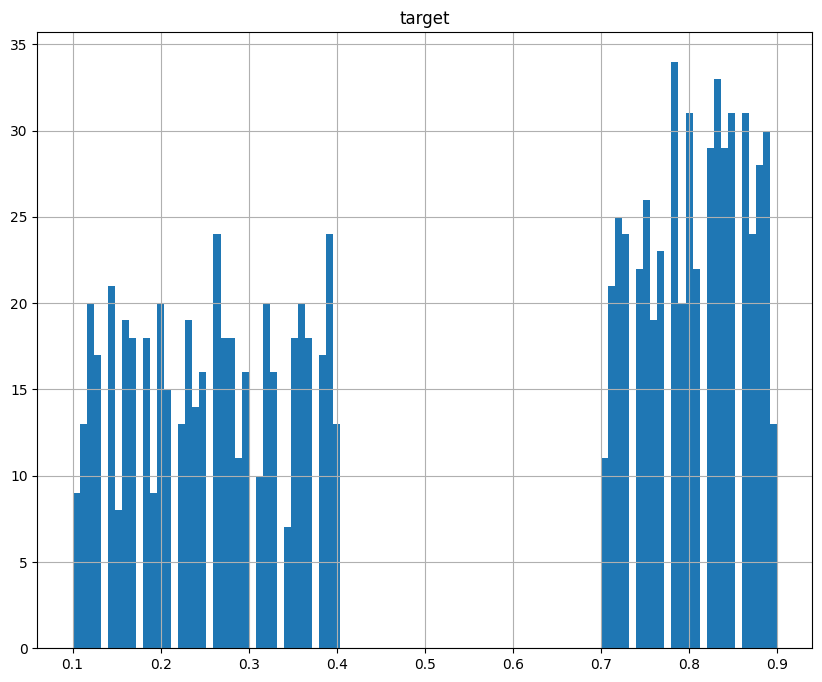

In [26]:
df[["target"]].hist(figsize=(10,8),bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x166c92200>,
 'caps': [<matplotlib.lines.Line2D at 0x166c92740>,
 'boxes': [<matplotlib.lines.Line2D at 0x166c91f60>],
 'medians': [<matplotlib.lines.Line2D at 0x166c92c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x166c92f20>],
 'means': []}

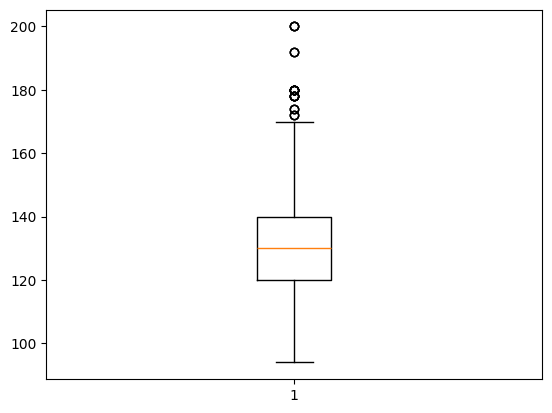

In [5]:
plt.boxplot(df["trestbps"])


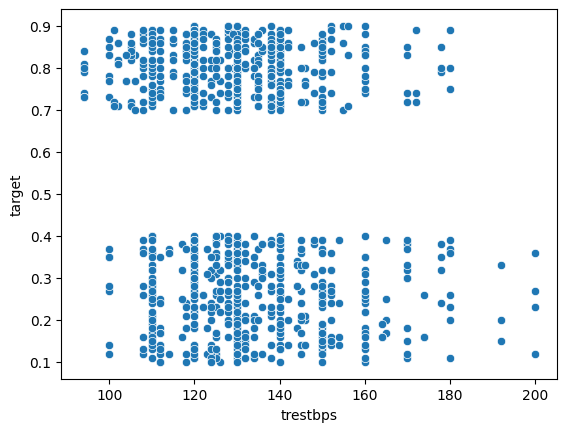

In [18]:
sns.scatterplot(data=df,x="trestbps",y="target")
plt.show()

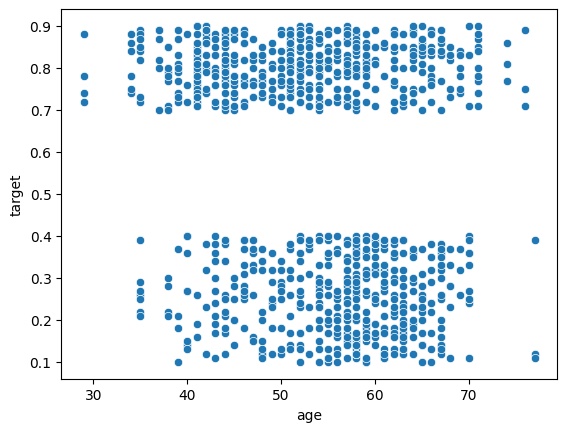

In [19]:
sns.scatterplot(data=df,x="age",y="target")
plt.show()

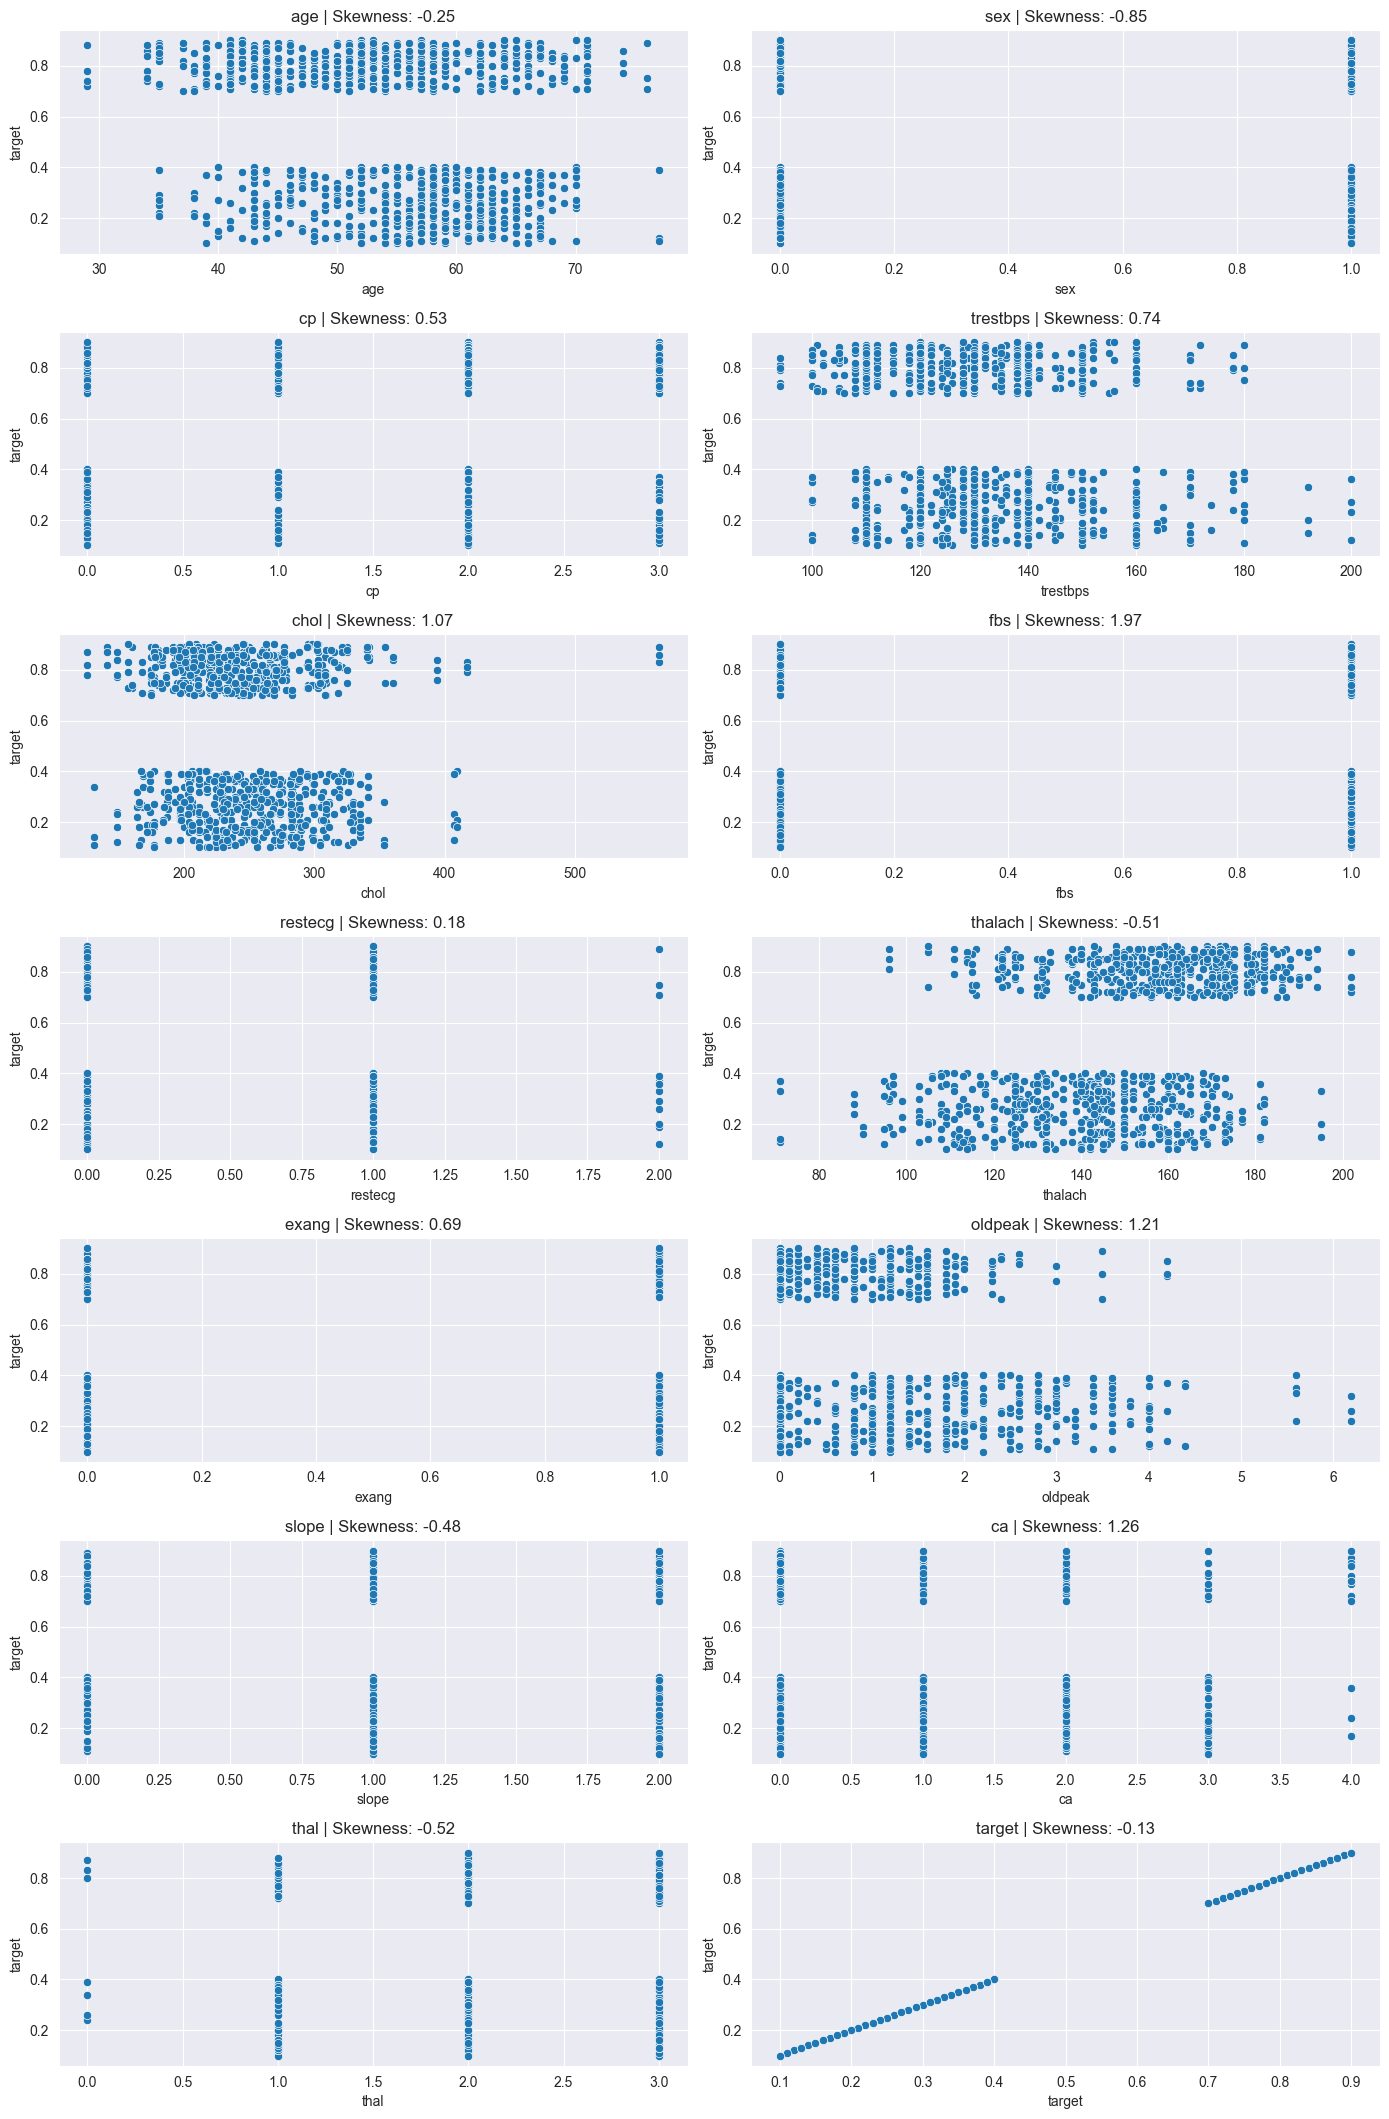

In [21]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.scatterplot(data=df,x=df[feature],y="target")
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Above it can be seen that thalach (highest recorded bpm) seems to correlate greatly with target.

{'whiskers': [<matplotlib.lines.Line2D at 0x140238520>,
 'caps': [<matplotlib.lines.Line2D at 0x140160580>,
 'boxes': [<matplotlib.lines.Line2D at 0x140238280>],
 'medians': [<matplotlib.lines.Line2D at 0x1402388e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x140238b80>],
 'means': []}

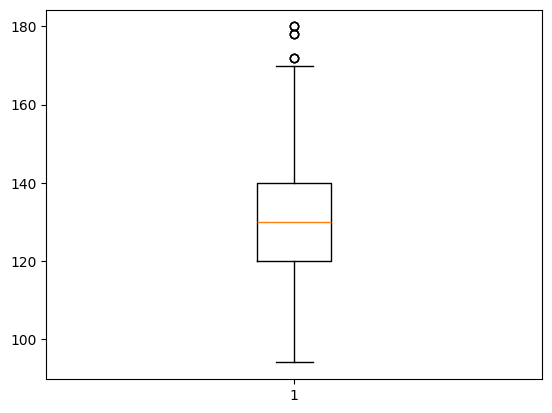

In [15]:
highrisk = df.loc[df["target"] > 0.5]
lowerrisk = df.loc[df["target"] < 0.5]
plt.boxplot(highrisk["trestbps"])
#plt.boxplot(lowerrisk["trestbps"])

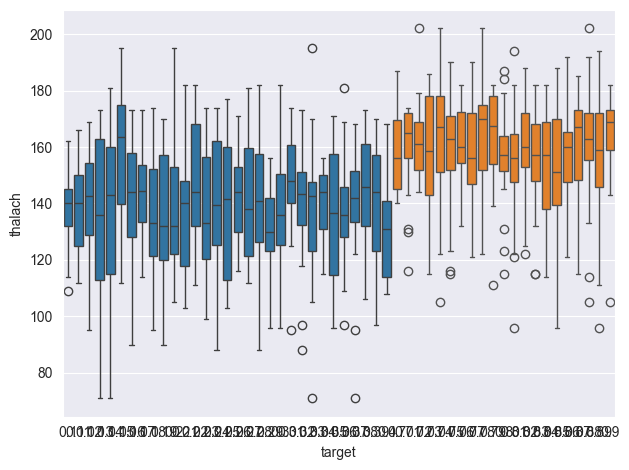

In [19]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
for dataset in (lowerrisk,highrisk):
	
	# Kernel density plot
	sns.boxplot(data=dataset,x="target",y="thalach")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

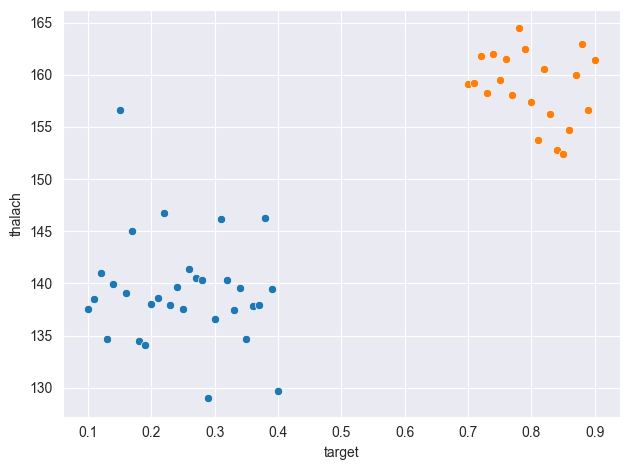

In [23]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

same_target_df_lower = lowerrisk.groupby(["target"])[["thalach"]].mean()
same_target_df_higher = highrisk.groupby(["target"])[["thalach"]].mean()

# Plot distribution of each numerical feature
# plt.figure(figsize=(14, len(numerical_columns) * 3))
for dataset in (same_target_df_lower,same_target_df_higher):
	
	# Kernel density plot
	sns.scatterplot(data=dataset,x="target",y="thalach")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

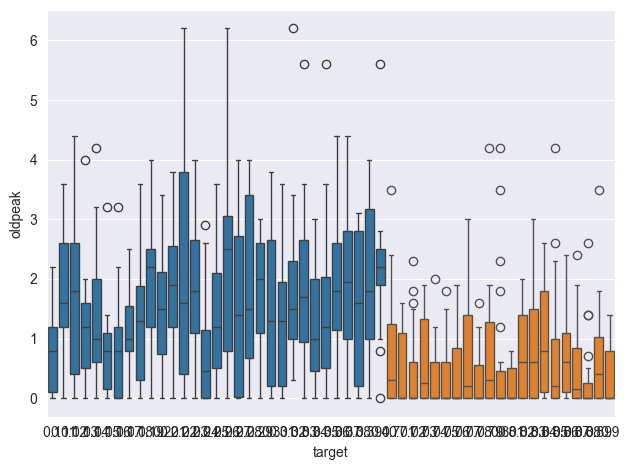

In [26]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
for dataset in (lowerrisk,highrisk):
	
	# Kernel density plot
	sns.boxplot(data=dataset,x="target",y="oldpeak")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

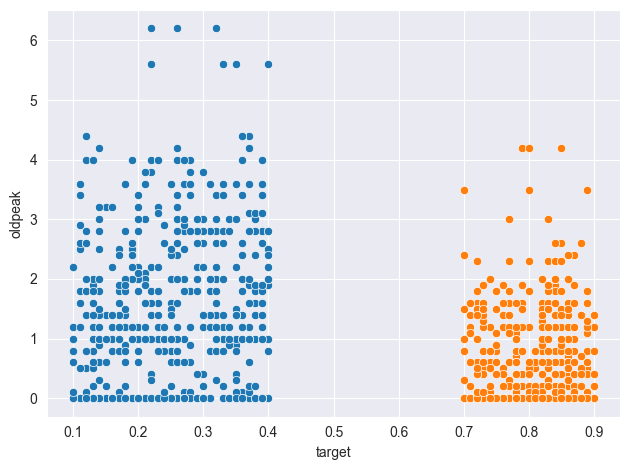

In [25]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
for dataset in (lowerrisk,highrisk):
	
	# Kernel density plot
	sns.scatterplot(data=dataset,x="target",y="oldpeak")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

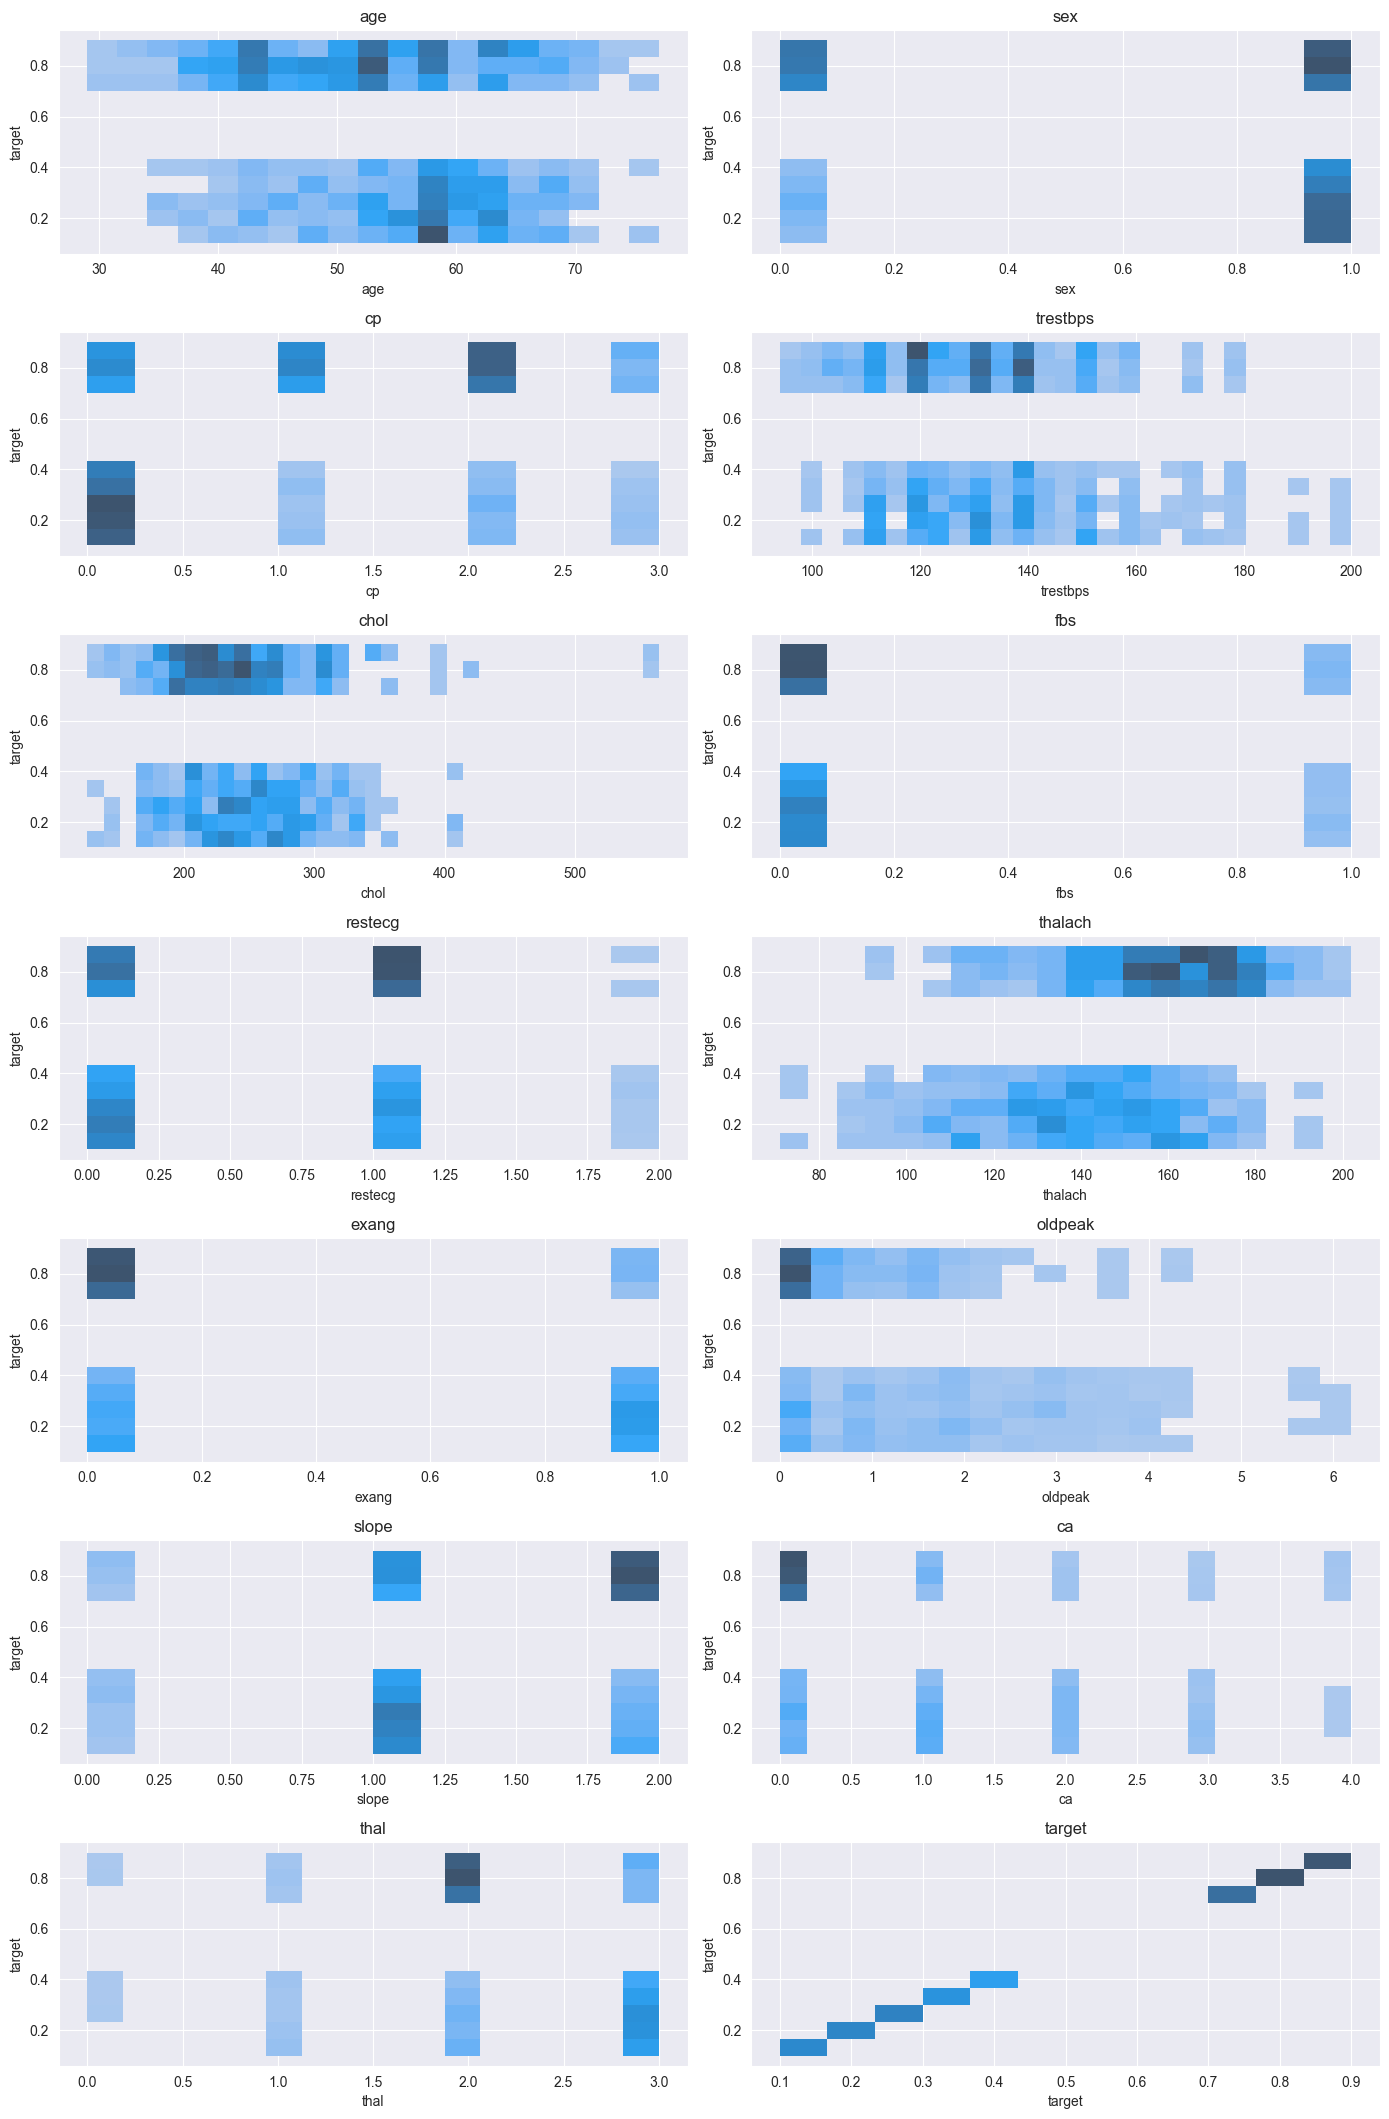

In [27]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(data=df,x=df[feature],y="target")
	plt.title(f"{feature}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Next Steps

This dataset is pretty interesting in concept, and could be used to predict who is most at risk for heart disease or attacks. This could be used to help people better prepare for possible future problems. This dataset specifically, however, is too small to be super helpful or to train a machine model on.